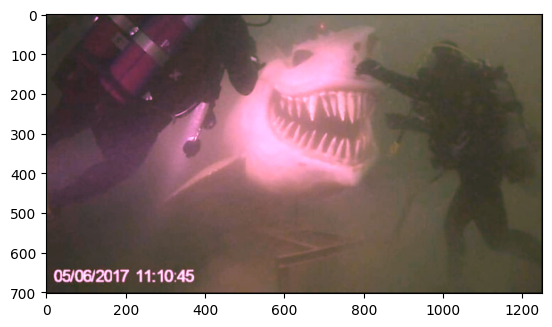

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
bgr_1 = [[219,62,36],
         [47,66,255],
         [235,116,254],
         [70,205,35],
         [254,251,82],
         [117,255,253],
         [255,254,253],
         [80,86,37],
         [43,60,17]]

bgr_7 = [[136,92, 1],
         [8,69,187],
         [130, 126, 167],
         [41,222,0],
         [197,252,0],
         [3,253,104],
         [206,255,97],
         [64,125,21],
         [17,65,0]]

def effect_img(img, img1, img7):
  h, w, c = img.shape
  out_img = np.zeros((h,w,c),np.uint8)
  for y in range(0,h-1):
    for x in range(0, w-1):
      wi=[]
      filter=[]
      bgr=[]
      for i in range(len(img7)):
        try:
          wi.append(1/math.sqrt((img[y,x,0]-img7[i][0])**2+(img[y,x,1]-img7[i][1])**2+(img[y,x,2]-img7[i][2])**2))
        except ZeroDivisionError:
          wi.append(0.01)
      for c in range(3):
        a=0
        b=0
        for i in range(len(img7)):
          a+=float(wi[i])*float(img1[i][c])
          b+=float(wi[i])*float(img7[i][c])
        filter.append(a/b)
        bgr.append(img[y,x,c]*filter[c])

        if bgr[c]>255:
          bgr[c]=255
        out_img[y,x,c]=bgr[c]
  
  cv2.imwrite('PATH', out_img)
  out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
  plt.imshow(out_img)
for n in range(1,6):
  img = cv2.imread('PATH')
  effect_img(img, bgr_1, bgr_7)

